## Network Interface: Dash + D3

In [1]:
import re, json
import pandas as pd
import numpy as np
import networkx as nx
from networkx.readwrite import json_graph

# Import (Jupyter) Dash -- App Functionality
import dash
from dash.dependencies import Input, Output
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from jupyter_dash import JupyterDash

# Declare directory location to shorten filepaths later.
abs_dir = "/Users/quinn.wi/Documents/Data/"

## App

In [2]:
with open(abs_dir + "Output/Graphs/JQA_Network_mergedEntities-correlation/network.json",
          "r") as f:
    G = json.load(f)
    
G = json_graph.node_link_graph(G, directed = True)

# external_stylesheets = ["https://codepen.io/chriddyp/pen/bWLwgP.css"]

# For vanilla dash, use 'dash.Dash(__name__)'
app = JupyterDash(__name__)#, external_stylesheets = external_stylesheets)

# df = nx.to_pandas_edgelist(G)

app.layout = html.Div([
    html.Div([
        html.I("Node Selection & Steps Away (press enter after changing name)"),
        html.Br(),
        dcc.Input(id = 'node-select', type = 'search', value = 'adams george', debounce=True), # Autocomplete possible?
        dcc.Input(id = 'ego-steps', type = 'number', value = 1, debounce=True),
        dcc.RangeSlider(id='edge-range', min=0, max=1, step=0.01, value=[0.98, 1],
                        marks = {0: '0', 0.25:'0.25', 0.5: '0.5', 0.75:'0.75', 1:'1'}),
        html.Br(),
    ]),
    
    
    html.Div([
        html.I("Network Graph"),
        dcc.Graph('graph-output')
    ])
    
])


# Use input values to update (subset) graph data.
@app.callback(
    Output('graph-output', 'children'),
    [Input("node-select", "value"), Input('ego-steps', 'value'), Input('edge-range', 'value')]
)
def update_graph_data(nodeSelect, steps, edge_range):
    ego = nx.ego_graph(G, nodeSelect, radius = steps)
    
    lower_horizon = [(u, v, w) for (u, v, w) in ego.edges.data('weight') if w < edge_range[0]]
    upper_horizon = [(u, v, w) for (u, v, w) in ego.edges.data('weight') if w >= edge_range[1]]
    
    ego.remove_edges_from(lower_horizon + upper_horizon)
    
    ego = json_graph.node_link_data(ego) # convert to json
        
    return ego
    


if __name__ == "__main__":
    app.run_server(mode = 'inline', debug = True) # mode = 'inline' for JupyterDash

(208, 3)
CPU times: user 827 ms, sys: 9.42 ms, total: 836 ms
Wall time: 853 ms


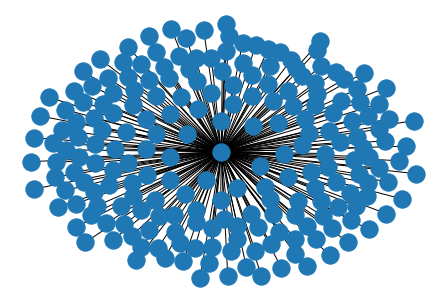

In [35]:
%%time

with open(abs_dir + "Output/Graphs/JQA_Network_mergedEntities-correlation/network.json",
          "r") as f:
    G = json.load(f)
    
G = json_graph.node_link_graph(G, directed = True)

df = nx.to_pandas_edgelist(G)

edges = df.query('source == "adams george"')
print (edges.shape)

nodes = edges['source'].tolist() + edges['target'].tolist()

nodes = pd.DataFrame(nodes, columns = ['Id']).drop_duplicates()
# first_degree = df.query('source == "adams george"')
# first_degree['degree'] = 'first'
# print (first_degree.shape)

# second_degree = df.loc[df['source'].isin(first_degree['target'].tolist())]
# second_degree['degree'] = 'second'
# print (second_degree.shape)

# nodes = first_degree['target'].tolist() + second_degree['target'].tolist() + ['adams george']
# nodes = pd.DataFrame(nodes, columns = ['Id'])
# len(nodes)

# edges = pd.concat([first_degree, second_degree])



# https://blog.datasciencedojo.com/network-theory-game-of-thrones/
def make_graph(nodes_df, edges_df):
    g = nx.Graph()

    for i,row in nodes.iterrows():
        keys = row.index.tolist()
        values = row.values
        # The dict contains all attributes
        g.add_node(row['Id'], **dict(zip(keys,values)))

    for i,row in edges.iterrows():
        keys = row.index.tolist()
        values = row.values
        g.add_edge(row['source'], row['target'],
                   **dict(zip(keys,values)))
    
    return g

g = make_graph(nodes, edges)

pos = nx.spring_layout(g)

nx.draw(g, pos)

In [39]:
%%time

with open(abs_dir + "Output/Graphs/JQA_Network_mergedEntities-correlation/network.json",
          "r") as f:
    G = json.load(f)
    
G = json_graph.node_link_graph(G, directed = True)

ego = nx.ego_graph(G, 'adams george', 1)

pos = nx.spring_layout(ego)

# nx.draw(ego, pos)

ego = nx.to_pandas_edgelist(ego)
ego.query('(source == "adams george") | (target == "adams george")').shape

CPU times: user 513 ms, sys: 6.44 ms, total: 519 ms
Wall time: 526 ms


(236, 3)